In [1]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("clean dataset.csv")

C:\Users\62812\AppData\Local\Temp\ipykernel_5920\2551409345.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


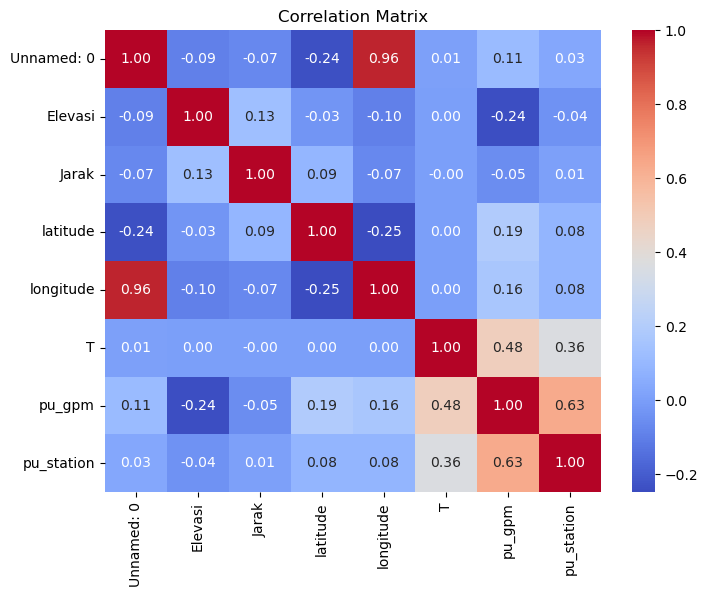

In [3]:
# Compute correlation matrix
import seaborn as sns
correlation_matrix = data.corr()

# Plot correlation matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [4]:
variables = {"Elevasi": True,
            "Jarak": True,  
            "latitude": True, 
            "longitude": True,
            "T": True,
            "pu_gpm": True}
features = []
for key,val in variables.items():
    if val == True:
        features.append(key)
        
print(f"features : {features}")
target = "pu_station"

features : ['Elevasi', 'Jarak', 'latitude', 'longitude', 'T', 'pu_gpm']


### Run this if the data test based on the scenario

In [5]:
import random
data1 = pd.read_excel("C:/Users/62812/Documents/Kerjaan Meteorologi/GPM-Correction/GPM-Correction/data/Skema Testing 2.xlsx")

stasiun_test = list(data1['Nama Stasiun'].unique())
# all_station = list(data['Nama Stasiun'])
# stasiun_test = random.sample(all_station,8)

data_test = data[data['Nama Stasiun'].isin(stasiun_test)]
data_train = data[~data['Nama Stasiun'].isin(stasiun_test)]

# Separate features (X) and target variable (y)
X_train = data_train[features] # Replace 'target_variable' with your actual target variable name
y_train = data_train[target]

X_test = data_test[features]
y_test = data_test[target]

### Run this if the data test randomly picked

In [6]:
# # # Split the data into training and testing sets
# X = data[features]
# y = data[target]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### Building Machine Learning model

In [7]:
# Import necessary libraries
from xgboost import XGBRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# # # Standardize the features (optional but often beneficial)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Initialize the regression model
# model = LinearRegression()
# model = XGBRegressor()
# model = RandomForestRegressor()
model = Ridge()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

# # Save the trained model for future use
# # You can use joblib or pickle for this purpose
# import joblib
# joblib.dump(model, 'model.pkl')
# # Extract coefficients
# m_hat = model.coef_[0]
# b_hat = model.intercept_

Mean Squared Error: 1551.79
Root Mean Squared Error: 39.39
R-squared: 0.52


### Simple Approach

In [8]:
pu_gpm_train = data_train['pu_gpm'].values
pu_obs_train = data_train['pu_station'].values

factor_scale = np.mean(pu_obs_train/pu_gpm_train)
print(f"Mean of the factor scale is {factor_scale}")

Mean of the factor scale is 1.0941831668430975


In [9]:
X_test_copy = data_test.copy()
X_test_copy["pu_pred"] = y_pred
X_test_copy["pu_true"] = y_test
X_test_copy["pu_gpm_x_fscale"] = X_test_copy['pu_gpm'].values * factor_scale
X_test_copy = X_test_copy.sort_values(by = "pu_true")
X_test_copy

,Unnamed: 0,Nama Stasiun,Elevasi,Jarak,latitude,longitude,T,pu_gpm,pu_station,pu_pred,pu_true,pu_gpm_x_fscale
8217,8217,Stasiun Meteorologi Mutiara Sis-Al Jufri,750.01420,7.840837,-0.85,119.95,2,61.680698,51.631505,93.908675,51.631505,67.489982
8218,8218,Stasiun Meteorologi Mutiara Sis-Al Jufri,750.01420,7.840837,-0.85,119.95,3,69.391139,61.328044,101.546262,61.328044,75.926616
8219,8219,Stasiun Meteorologi Mutiara Sis-Al Jufri,750.01420,7.840837,-0.85,119.95,4,74.325907,67.533938,106.476493,67.533938,81.326157
8220,8220,Stasiun Meteorologi Mutiara Sis-Al Jufri,750.01420,7.840837,-0.85,119.95,5,77.978906,72.127896,110.156501,72.127896,85.323206
8221,8221,Stasiun Meteorologi Mutiara Sis-Al Jufri,750.01420,7.840837,-0.85,119.95,6,80.884205,75.781559,113.107213,75.781559,88.502136
...,...,...,...,...,...,...,...,...,...,...,...,...
1580,1580,Stasiun Meteorologi Hang Nadim,4.42274,0.000000,1.15,104.05,97,294.376058,344.381820,306.465778,344.381820,322.101327
10394,10394,Stasiun Meteorologi Mozez Kilangin,101.82520,48.090980,-4.55,136.85,100,290.167828,344.500371,309.473848,344.500371,317.496752
1581,1581,Stasiun Meteorologi Hang Nadim,4.42274,0.000000,1.15,104.05,98,294.801652,344.894455,306.997816,344.894455,322.567005
1582,1582,Stasiun Meteorologi Hang Nadim,4.42274,0.000000,1.15,104.05,99,295.222903,345.401858,307.525619,345.401858,323.027931


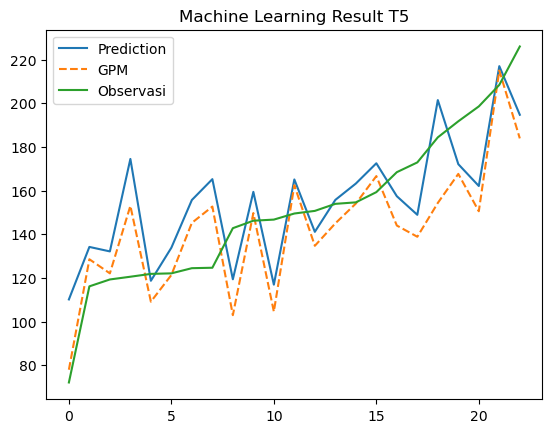

In [10]:
m = 0
n = len(data)
T = 5
df_result_ML = X_test_copy[X_test_copy['T'] == T]

y_gpm = df_result_ML['pu_gpm'].values
y_true = df_result_ML['pu_true'].values
y_pred = df_result_ML['pu_pred'].values
y_simple = df_result_ML['pu_gpm_x_fscale'].values

x_axis = np.arange(0,len(y_true))

plt.plot(x_axis[m:m+n], y_pred[m:m+n], label = "Prediction")
plt.plot(x_axis[m:m+n], y_gpm[m:m+n], label = "GPM", linestyle = "--")
#plt.plot(x_axis[m:m+n], y_simple[m:m+n], label = "GPM x fscale", linestyle = "--")
plt.plot(x_axis[m:m+n] , y_true[m:m+n], label = "Observasi")
plt.title(f"Machine Learning Result T{T}")
plt.legend()

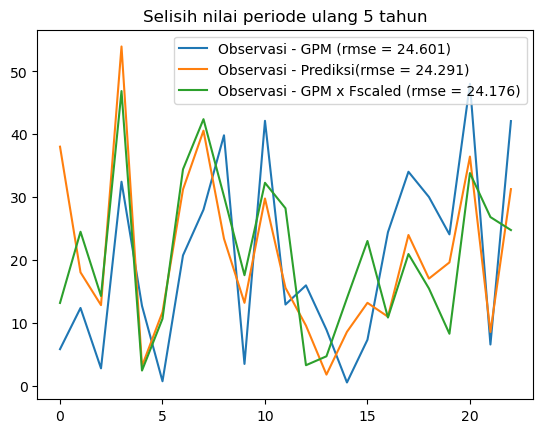

In [11]:
selisih_obs_gpm = y_true - y_gpm
selisih_obs_pred = y_true - y_pred
selisih_obs_gpm_fsclae = y_true - y_simple

mse_obs_gpm = np.round(np.sqrt(mean_squared_error(y_true, y_gpm)),3)
mse_obs_pred = np.round(np.sqrt(mean_squared_error(y_true, y_pred)),3)
mse_obs_gpm_fscaled = np.round(np.sqrt(mean_squared_error(y_true, y_simple)),3)

plt.plot(x_axis, abs(selisih_obs_gpm), label = f"Observasi - GPM (rmse = {mse_obs_gpm})")
plt.plot(x_axis, abs(selisih_obs_pred), label = f"Observasi - Prediksi(rmse = {mse_obs_pred})")
plt.plot(x_axis, abs(selisih_obs_gpm_fsclae), label = f"Observasi - GPM x Fscaled (rmse = {mse_obs_gpm_fscaled})")

plt.title(f"Selisih nilai periode ulang {T} tahun")
plt.legend()
plt.show()

In [12]:
class Evaluation:
    def __init__(self, model):
        self.model = model

    def calculate_mse(self, y_pred, y_true):
        mse = mean_squared_error(y_pred=y_pred, y_true= y_true)
        return mse

    def calculate_rmse(self, y_pred, y_true):
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        return rmse
    
    def calculate_nmse_mean(self, y_pred, y_true):
        rmse = self.calculate_rmse(y_pred=y_pred , y_true=y_true)
        nmse_mean = rmse/np.mean(y_true)
        return nmse_mean
    
    def calculate_nmse_std(self, y_pred, y_true):
        rmse = self.calculate_rmse(y_pred=y_pred , y_true=y_true)
        nmse_std = rmse/np.std(y_true)
        return nmse_std
    
    def calculate_nmse_min_max(self, y_pred, y_true):
        rmse = self.calculate_rmse(y_pred=y_pred , y_true=y_true)
        nmse_min_max = rmse/(np.max(y_true) - np.min(y_true))
        return nmse_min_max
        
evaluation = Evaluation(model)
def eval_model(model, x_test, y_test, criterion):
    model.eval()
    with torch.no_grad():
        y_pred_tensor = model(x_test)
        mse = criterion(y_pred_tensor, y_test)
    model.train()
    return mse

### Data PreProcessing for Deep Learning input and output

In [13]:
# # Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train.values)
y_train_tensor = torch.FloatTensor(y_train.values)
X_test_tensor = torch.FloatTensor(X_test.values)
y_test_tensor = torch.FloatTensor(y_test.values)

y_train_tensor = y_train_tensor.reshape(len(y_train_tensor),1)
y_test_tensor = y_test_tensor.reshape(len(y_test_tensor),1)

In [14]:
# Define the neural network model
class RegressionModel(nn.Module):
    def __init__(self, input_size):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32,64)
        self.fc3 = nn.Linear(64,32)
        self.fc4 = nn.Linear(32,1)
        self.sigmoid = nn.Sigmoid()
        self.silu = nn.SiLU() 

    def forward(self, x):
        x = self.fc1(x)
        x = self.sigmoid(x)
        x = self.fc2(x)
        x = self.silu(x)
        x = self.fc3(x)
        x = self.silu(x)
        x = self.fc4(x)
        x = self.silu(x)
        return x

In [26]:
# Initialize the model
input_size = X_train.shape[1]
model = RegressionModel(input_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Convert data to DataLoader for batching
train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)

# Training the model
num_epochs = 100

train_loss, eval_loss = [],[]
for epoch in range(num_epochs):
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
    mse_eval = eval_model(model, X_test_tensor, y_test_tensor, criterion)
    train_loss.append(loss.item())
    eval_loss.append(mse_eval)
    print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {loss.item():.4f}, Eval Loss: {mse_eval}')

Epoch [1/100], Train Loss: 51300.2305, Eval Loss: 48560.12109375
Epoch [2/100], Train Loss: 50536.4102, Eval Loss: 48413.5390625
Epoch [3/100], Train Loss: 52391.4648, Eval Loss: 48000.0859375
Epoch [4/100], Train Loss: 50445.9648, Eval Loss: 47141.93359375
Epoch [5/100], Train Loss: 49884.1562, Eval Loss: 45902.2109375
Epoch [6/100], Train Loss: 56111.0195, Eval Loss: 44181.3671875
Epoch [7/100], Train Loss: 44235.7109, Eval Loss: 41878.45703125
Epoch [8/100], Train Loss: 46311.6172, Eval Loss: 38976.69921875
Epoch [9/100], Train Loss: 51214.5273, Eval Loss: 35498.2890625
Epoch [10/100], Train Loss: 39635.5703, Eval Loss: 31668.349609375
Epoch [11/100], Train Loss: 35184.1250, Eval Loss: 27567.296875
Epoch [12/100], Train Loss: 28970.3262, Eval Loss: 23469.265625
Epoch [13/100], Train Loss: 22560.2266, Eval Loss: 19505.17578125
Epoch [14/100], Train Loss: 12964.0518, Eval Loss: 15802.275390625
Epoch [15/100], Train Loss: 18559.5977, Eval Loss: 12526.876953125
Epoch [16/100], Train Los

In [17]:
# Convert predictions and targets back to NumPy arrays
y_pred = model(X_test_tensor)
y_pred = y_pred.detach().numpy()
y_true = y_test_tensor.detach().numpy()

# Print the mean squared error
print(f'Mean Squared Error on Test Data: {mse.item():.4f}')

r2 = r2_score(y_true, y_pred)
print(f"R-squared: {r2:.2f}")

Mean Squared Error on Test Data: 1551.7933
R-squared: 0.57


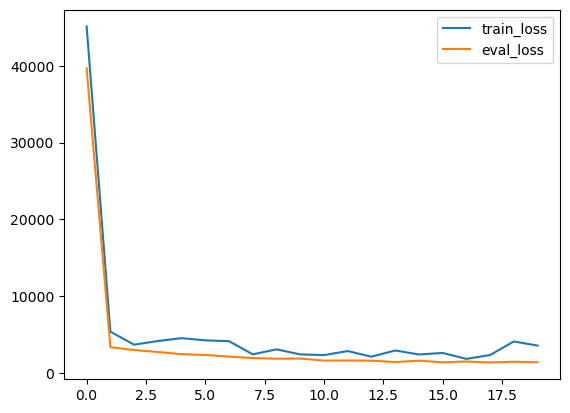

In [18]:
plt.plot(np.arange(0,len(train_loss)), train_loss, label = "train_loss")
plt.plot(np.arange(0,len(eval_loss)), eval_loss, label = "eval_loss")
plt.legend()

In [19]:
X_test_copy1 = X_test.copy()
X_test_copy1["pu_pred"] = y_pred
X_test_copy1["pu_true"] = y_true
X_test_copy1 = X_test_copy1.sort_values(by = "pu_true")
X_test_copy1

,Elevasi,Jarak,latitude,longitude,T,pu_gpm,pu_pred,pu_true
8217,750.01420,7.840837,-0.85,119.95,2,61.680698,82.462997,51.631504
8218,750.01420,7.840837,-0.85,119.95,3,69.391139,91.551369,61.328045
8219,750.01420,7.840837,-0.85,119.95,4,74.325907,92.959358,67.533936
8220,750.01420,7.840837,-0.85,119.95,5,77.978906,93.430412,72.127899
8221,750.01420,7.840837,-0.85,119.95,6,80.884205,93.660912,75.781555
...,...,...,...,...,...,...,...,...
1580,4.42274,0.000000,1.15,104.05,97,294.376058,260.394531,344.381805
10394,101.82520,48.090980,-4.55,136.85,100,290.167828,269.811066,344.500366
1581,4.42274,0.000000,1.15,104.05,98,294.801652,259.915649,344.894440
1582,4.42274,0.000000,1.15,104.05,99,295.222903,259.431824,345.401855


In [20]:
df_result_T = X_test_copy1[X_test_copy1['T'] < 20]

In [24]:
df_result_T

,Elevasi,Jarak,latitude,longitude,T,pu_gpm,pu_pred,pu_true
8217,750.0142,7.840837,-0.85,119.95,2,61.680698,82.462997,51.631504
8218,750.0142,7.840837,-0.85,119.95,3,69.391139,91.551369,61.328045
8219,750.0142,7.840837,-0.85,119.95,4,74.325907,92.959358,67.533936
8220,750.0142,7.840837,-0.85,119.95,5,77.978906,93.430412,72.127899
8221,750.0142,7.840837,-0.85,119.95,6,80.884205,93.660912,75.781555
...,...,...,...,...,...,...,...,...
10309,101.8252,48.090980,-4.55,136.85,15,224.145402,216.944031,270.875397
10310,101.8252,48.090980,-4.55,136.85,16,226.432780,221.530579,273.426178
10311,101.8252,48.090980,-4.55,136.85,17,228.576906,225.322037,275.817200
10312,101.8252,48.090980,-4.55,136.85,18,230.594682,228.441406,278.067322


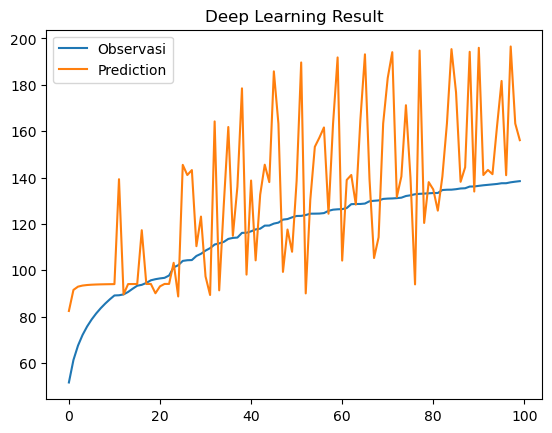

In [25]:
m = 0
n = 100
y_gpm = df_result_T['pu_gpm'].values
y_true = df_result_T['pu_true'].values
y_pred = df_result_T['pu_pred'].values
x_axis = np.arange(0,len(y_true))
plt.plot(x_axis[m:m+n] , y_true[m:m+n], label = "Observasi")
plt.plot(x_axis[m:m+n], y_pred[m:m+n], label = "Prediction")
#plt.plot(x_axis[m:m+n], y_gpm[m:m+n], label = "GPM", linestyle = "--")
plt.title("Deep Learning Result")
plt.legend()